In [14]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

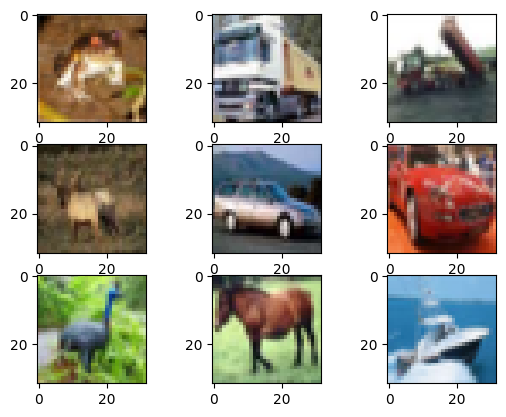

In [15]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
plt.show()

In [16]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [17]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(50000, 10)


In [18]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
x_train_float = x_train.astype("float32")
x_test_float = x_test.astype("float32")
x_train_normalized = x_train_float / 255
x_test_normalized = x_test_float / 255

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(80, kernel_initializer="glorot_uniform", activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_initializer="glorot_uniform", activation="softmax"))

c:\Users\Matheus\Desktop\Matheus\Programming\Python\MachineLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
historic = model.fit(
    x_train_normalized,
    y_train,
    batch_size=200,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    verbose=1,
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.2566 - loss: 1.9936 - val_accuracy: 0.4568 - val_loss: 1.5313
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4481 - loss: 1.5054 - val_accuracy: 0.5352 - val_loss: 1.2947
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5103 - loss: 1.3684 - val_accuracy: 0.5791 - val_loss: 1.1802
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5453 - loss: 1.2683 - val_accuracy: 0.6035 - val_loss: 1.1331
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5758 - loss: 1.2020 - val_accuracy: 0.6222 - val_loss: 1.0796
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5975 - loss: 1.1354 - val_accuracy: 0.6379 - val_loss: 1.0474
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6183 - loss: 1.0867 - val_accuracy: 0.6511 - val_loss: 1.0091
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6269 - loss: 1.0550 - val_acc

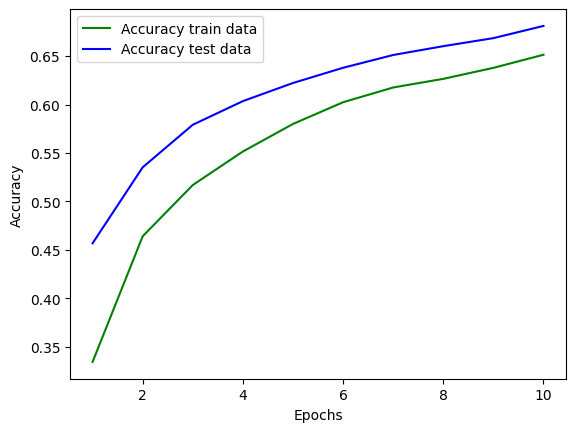

In [22]:
import matplotlib.pyplot as plt

accuracy_train = historic.history["accuracy"]
accuracy_test = historic.history["val_accuracy"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug_data = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True
)
train_improved = aug_data.flow(x_train_normalized, y_train, batch_size=200)

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

n_steps = int(x_train_normalized.shape[0] / 200)
historic = model.fit(
    train_improved,
    steps_per_epoch=n_steps,
    epochs=50,
    validation_data=(x_test_normalized, y_test),
    verbose=1,
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.5904 - loss: 1.1847 - val_accuracy: 0.6529 - val_loss: 0.9886
Epoch 2/50


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6529 - val_loss: 0.9886
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6085 - loss: 1.1163 - val_accuracy: 0.6812 - val_loss: 0.9152
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6812 - val_loss: 0.9152
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.6161 - loss: 1.0985 - val_accuracy: 0.6782 - val_loss: 0.9238
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6782 - val_loss: 0.9238
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6139 - loss: 1.0948 - val_accuracy: 0.6838 - val_loss: 0.9147
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6838 - val_loss: 0.9147
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6293 - lo

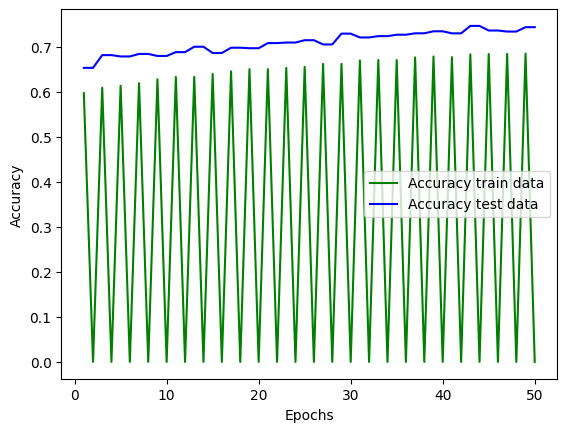

In [24]:
accuracy_train = historic.history["accuracy"]
accuracy_test = historic.history["val_accuracy"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()